# Importing libraries

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns

# 1. Importing train and test data

In [244]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [245]:
train_data.shape
print(f"The number of passengers in the train_data is {train_data.shape[0]}")

The number of passengers in the train_data is 891


In [246]:
test_data.shape
print(f"The number of passengers in the test_data is {test_data.shape[0]}")

The number of passengers in the test_data is 418


In [247]:
train_data.head() # first 5 rows of the train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Analyzing the train_data
## This will help us get insights about the data through visualization

### ***Count of Male and female***

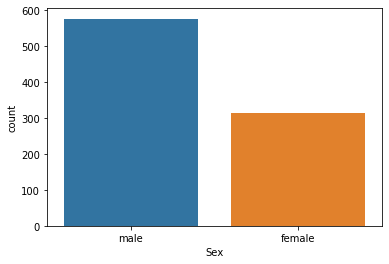

In [248]:
sns.countplot(x="Sex",data=train_data)

### ***we can check the count of survived passengers***

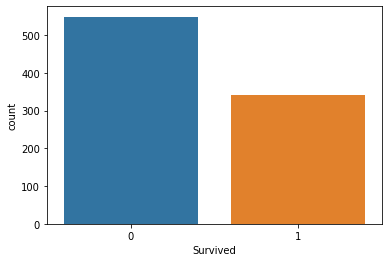

In [249]:
sns.countplot(x="Survived",data=train_data)

### ***from the above plot, we can see that the count of not survived is more as compared to count of survived***

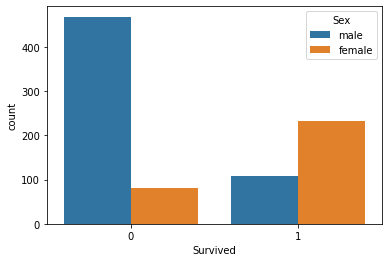

In [250]:
sns.countplot(x="Survived",hue="Sex",data=train_data)

### ***from the above plot, we can see that the count of not survived male is comparitavely higher than the count of not survived female***

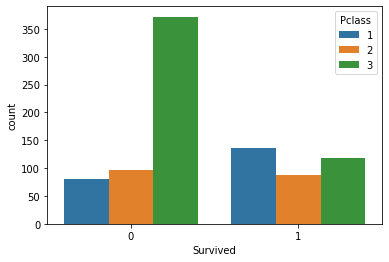

In [251]:
sns.countplot(x="Survived",hue="Pclass",data=train_data)

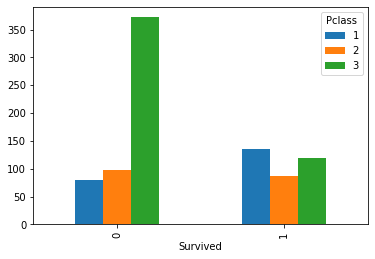

In [252]:
pd.crosstab(train_data["Survived"],train_data["Pclass"]).plot(kind="bar") # another approach

### ***from the above plot, we can see that the passengers having Pclass = 3  has the most number of not survived***
### ***Also, passenger having Pclass = 1, has fewer number of not survived***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E36BD8DF88>,
      dtype=object)

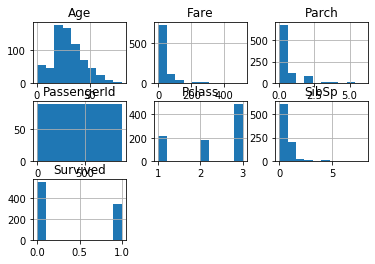

In [253]:
train_data.hist()

In [254]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


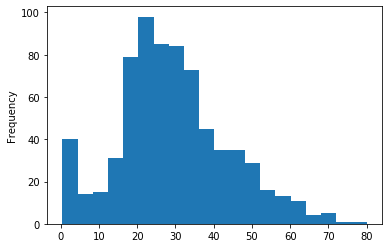

In [255]:
train_data["Age"].plot(kind="hist",bins=20)

### ***From the above plot, we can see that the majority of the age of the passengers fall between approx 20~30***

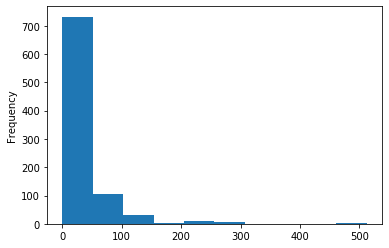

In [256]:
train_data["Fare"].plot(kind="hist",bins=10)

### ***From the above plot, we can see that the fare of the passengers fall between approx 0~100***

### IMP: Information regarding the other columns description like SipSp and Parch not available

# 3. Data wrangling -- dealing with null values and outliers

In [257]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Checked and found that the data types are correct. No need to make corrections

### ***Finding out the missing values from the train and test data***

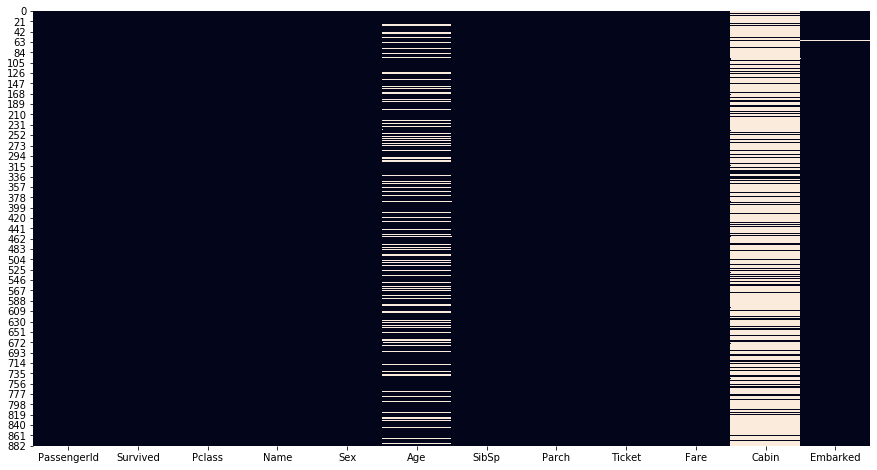

In [258]:
### Visualizing the missing values in train_data:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.isnull(),cbar=False)

In [259]:
# train_data missing values:
for i in train_data.columns:
    print(f"Missing values in percentage for {i} is {round((train_data[i].isnull().sum()/len(train_data))*100,2)}")

Missing values in percentage for PassengerId is 0.0
Missing values in percentage for Survived is 0.0
Missing values in percentage for Pclass is 0.0
Missing values in percentage for Name is 0.0
Missing values in percentage for Sex is 0.0
Missing values in percentage for Age is 19.87
Missing values in percentage for SibSp is 0.0
Missing values in percentage for Parch is 0.0
Missing values in percentage for Ticket is 0.0
Missing values in percentage for Fare is 0.0
Missing values in percentage for Cabin is 77.1
Missing values in percentage for Embarked is 0.22


In [260]:
# test_data missing values:
for i in test_data.columns:
    print(f"Missing values in percentage for {i} is {round((test_data[i].isnull().sum()/len(test_data))*100,2)}")

Missing values in percentage for PassengerId is 0.0
Missing values in percentage for Pclass is 0.0
Missing values in percentage for Name is 0.0
Missing values in percentage for Sex is 0.0
Missing values in percentage for Age is 20.57
Missing values in percentage for SibSp is 0.0
Missing values in percentage for Parch is 0.0
Missing values in percentage for Ticket is 0.0
Missing values in percentage for Fare is 0.24
Missing values in percentage for Cabin is 78.23
Missing values in percentage for Embarked is 0.0


### NULL values impuations

### ***if null values ~ 80-95% -- drop columns***
### ***if null values ~ 5-15% -- if not losing important data, we can drop rows***
### ***if null values ~20-35% -- we cannot lose this much amount of data, therefore replacing it with mean or median values***

### from the above plots and calculations we can see that the cabin has approx~ 80% of the data is missing so we can drop the column "Cabin" from both the train and test data

### Also for column "Age", as we can see that the  missing data is 24% , hence replacing the data with median values as the data is right skewed

In [261]:
# Null values  ~ train_data
train_data.drop(columns="Cabin",inplace=True)

In [262]:
train_data["Age"].fillna(np.mean(train_data["Age"]),inplace=True)

In [263]:
train_data.head(2) # printing first two rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [264]:
# checking null values after imputaion
train_data.dropna(inplace=True)
train_data.isnull().sum().sum() 

0

In [265]:
# Null values  ~ test_data
test_data.drop(columns="Cabin",inplace=True)
test_data["Age"].fillna(np.mean(test_data["Age"]),inplace=True)
test_data.head(2) # printing first two rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [266]:
# checking null values after imputaion
test_data.dropna(inplace=True)
test_data.isnull().sum().sum() 

0

### Visualizing null values after imputation

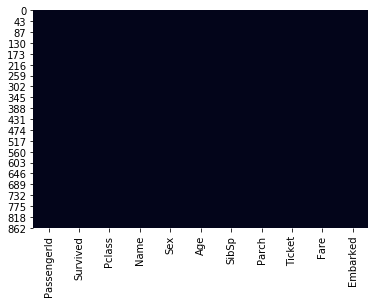

In [267]:
sns.heatmap(train_data.isnull(),cbar=False)

### ***Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.***
### ***Converting string values to numerical values for the survided column***

In [268]:
sex= pd.get_dummies(train_data["Sex"],drop_first=True)

In [269]:
embarked = pd.get_dummies(train_data["Embarked"],drop_first=True)

In [270]:
pclass = pd.get_dummies(train_data["Pclass"],drop_first=True)

In [271]:
train_dataset = pd.concat([train_data,sex,embarked,pclass],axis=1)
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0,0,0


In [272]:
### dropping the unnecessary colums
train_dataset.drop(["PassengerId","Pclass","Name","Sex","Age","Ticket","Embarked"],inplace=True,axis=1)

In [275]:
train_dataset

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,0,1,0,7.2500,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0
2,1,0,0,7.9250,0,0,1,0,1
3,1,1,0,53.1000,0,0,1,0,0
4,0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,1,0,1,1,0
887,1,0,0,30.0000,0,0,1,0,0
888,0,1,2,23.4500,0,0,1,0,1
889,1,0,0,30.0000,1,0,0,0,0


In [274]:
sex= pd.get_dummies(test_data["Sex"],drop_first=True)
embarked = pd.get_dummies(test_data["Embarked"],drop_first=True)
pclass = pd.get_dummies(test_data["Pclass"],drop_first=True)
test_dataset = pd.concat([test_data,sex,embarked,pclass],axis=1)


In [191]:
test_dataset.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1


In [203]:
test_dataset.head()

,SibSp,Parch,Fare,male,Q,S,2,3
0,0,0,7.8292,1,1,0,0,1
1,1,0,7.0000,0,0,1,0,1
2,0,0,9.6875,1,1,0,1,0
3,0,0,8.6625,1,0,1,0,1
4,1,1,12.2875,0,0,1,0,1


# Train Data

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [232]:
X = train_dataset.drop('Survived',axis=1)
y = train_dataset['Survived']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [234]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
predections = logmodel.predict(X_test)
predections

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [236]:
print(confusion_matrix(y_test, predections))

[[144  22]
 [ 25  76]]


In [276]:
print(classification_report(y_test, predections))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.78      0.75      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [237]:
print(accuracy_score(y_test, predections))

0.8239700374531835


In [239]:
test_predictions = logmodel.predict(test_dataset)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [241]:
test_dataset['Survived'] = test_predictions

In [242]:
test_dataset.head()

,SibSp,Parch,Fare,male,Q,S,2,3,Survived
0,0,0,7.8292,1,1,0,0,1,0
1,1,0,7.0000,0,0,1,0,1,1
2,0,0,9.6875,1,1,0,1,0,0
3,0,0,8.6625,1,0,1,0,1,0
4,1,1,12.2875,0,0,1,0,1,1


### Go through the app and evaluate - (i) How can a Data science/Machine Learning based model enhance
### the overall user experience in this app. Only theoretical text based answer required.

After getting the information from the database regarding the time spent by the customer on the app and the itemss that has been checked out by the customers
we can apply different statistical models to that data in order to get insight for the items which are frequently ordered by the customer and can decide a parameter which will help them in recommending the particular item to the customer
We can perform various test to get effect of price on the particular product using the anova test and then can tweak the prices so as to get more customers
We can region wise select the effect of the region on the choices of the customers using the chi square.

In [ ]:
################################### ENd##############################################################################